# ASSIGNMENT 3 
## AE 238 : AEROSPACE STRUCTURES

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1
### Part (i)
Lets analyse the Forces and Loads acting on the rotating beam in the rotating frame. We chose the rotating frame because the beam is stationary in it. We can see that there are **no loads** on the beam, and the centrifugal forces act like a body force field given by the expression $\frac{d\vec{F}}{dm} = \omega^2x \hat{r}$ ,along the radial distance at a length x

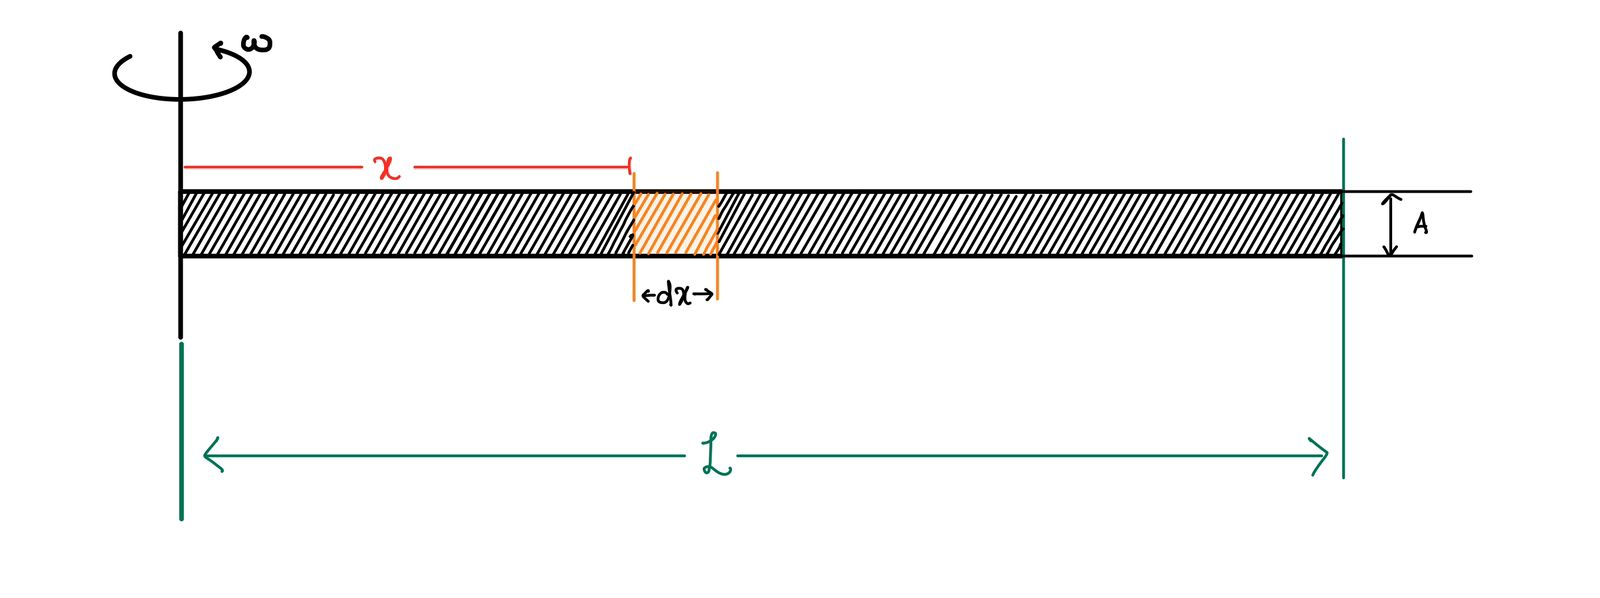
Now the beam is of length L and pivoted at axis of rotation. The assumptions we are going to make is that this is a one dimentional problem and all parameters vary based on $x$ alone. The rod is of uniform cross sectional area A. Now we are interested in axial deformation field $u(x)$ and the axial stress $\sigma$.
<br>
Now taking a small elemental section at a distance x , lets analyse the equilibrium of this peice.
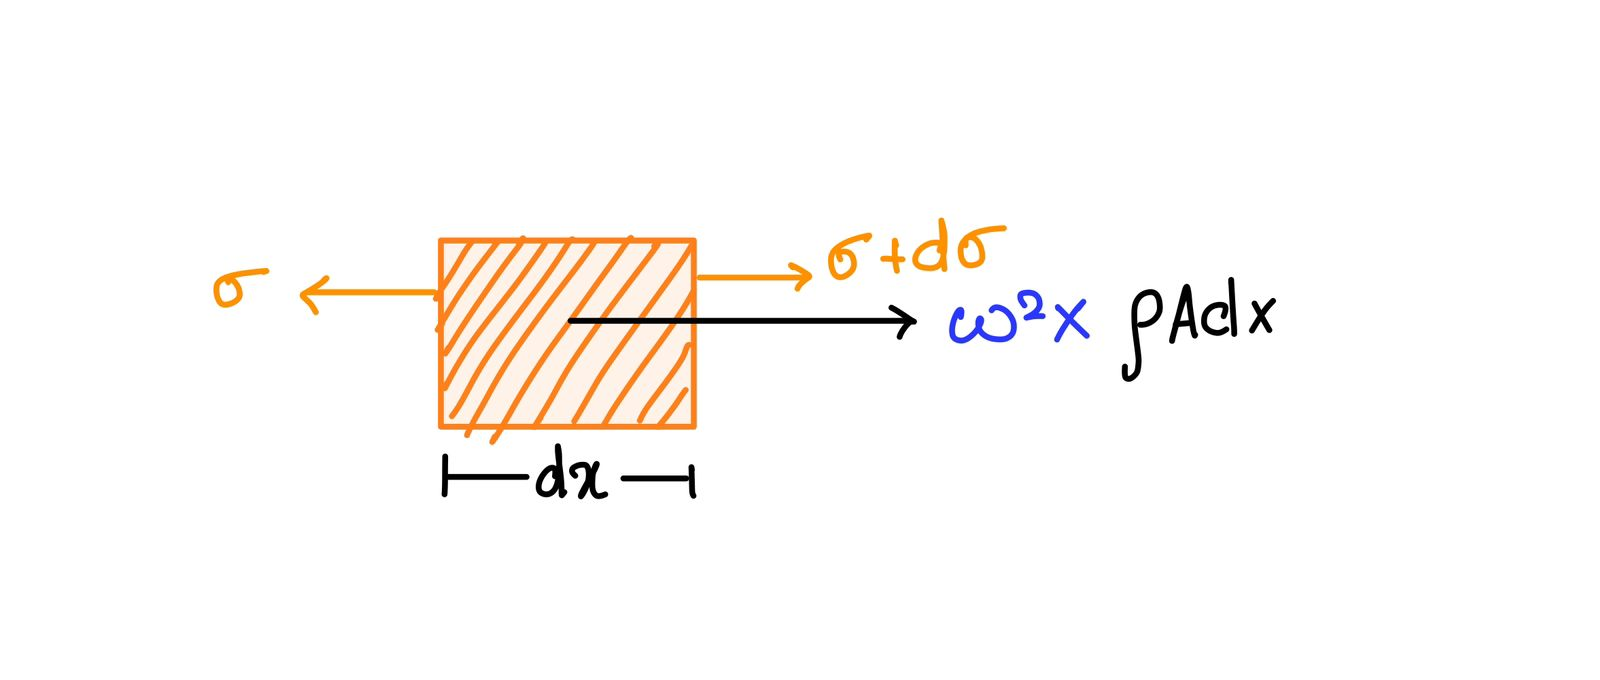
The mass of this element is $dm = \rho A dx$ . Now the body force acting on the element is $df = (\omega^2 x\rho A dx)\hat{r}$ and this is balanced by the change in stress on both faces of the element. We know from Hookes Law that $\sigma_{axial} = \mathbf{E} \epsilon_{axial}$. Since we deal with a one D problem , $\epsilon_{axial} = \frac{\partial u}{\partial x}$ and since u is a function of x we have $\sigma(x) = \mathbf{E} \dfrac{du}{dx}$ . <br>
Now the tractional forces acting on the element is $$A\vec{t}(x+dx) +  A\vec{t}(x)= $$  $$A\sigma(x+dx)\hat{r} + A\sigma(x)(\hat{-r}) $$ which is nothing but $Ad\sigma = A\dfrac{d\sigma}{dx}dx $ .<br>This means $$df_{traction} = AE \dfrac{d^2u}{dx^2}dx\hat{r}$$
Now adding all forces and balancing the element we get the following equation. Lets also cancel out A and dx : 
$$\omega^2 x\rho A dx\hat{r} + AE \dfrac{d^2u}{dx^2}dx\hat{r} = 0 $$
$$\omega^2 x\rho  + E \dfrac{d^2u}{dx^2} = 0$$
With some rearrangements we can finally get required differential equation 
$$\boxed{  \dfrac{d^2u(x)}{dx^2}+ (\dfrac{\rho \omega^2}{E}) x  = 0}$$

### Part (ii)
**Objective:** To compute an analytical solution to the above differential equation , subject to some physical boundary conditions and to compute the tip displacement $u(L)$ as a function of $\omega$ <br>
$$\text{our differential equation is } \dfrac{d^2u(x)}{dx^2}+ (\dfrac{\rho \omega^2}{E}) x  = 0$$
**Boundary Conditions:**<br> the end at x = 0 is pivoted hence $u(0) = 0$ (_Dirchlet BC_) and the end x = L is free end hence stress is zero so $u'(L) = 0$ (_Neumann BC_)<br>
Now lets integrate the differential equation from x to L : 
$$\int^{L}_{x}(\dfrac{d^2u(x)}{dx^2}+ (\dfrac{\rho \omega^2}{E})x)dx = 0 $$<br>
$$\dfrac{du(L)}{dx} - \dfrac{du(x)}{dx} + \dfrac{\rho \omega^2}{2E}(L^2 - x^2) = 0 $$<br>
Apply Neumann BC:
$$0 - \dfrac{du(x)}{dx} + \dfrac{\rho \omega^2}{2E}(L^2 - x^2) = 0 $$<br>
$$ \dfrac{\rho \omega^2}{2E}(L^2 - x^2) = \dfrac{du(x)}{dx}$$
<Br> Now integrate the above expression from 0 to x and apply dirchlet BC u(0) = 0 and obtain 
    $$u(x) - u(0) = \int^{x}_0 \dfrac{\rho \omega^2}{2E}(L^2 - x^2)dx $$ <br>
    $$u(x)=  \dfrac{\rho \omega^2}{2E}(L^2 x- \dfrac{x^3}{3}) $$<br>
    In a cleaner fashion we can write it as 
    $$ \boxed{u(x) = \dfrac{\rho \omega^2x}{6E}(3L^2- x^2)}$$<br>
Now above is our analytical solution to the **Simplified Helicopter Blade** problem.
Lets  compute the tip displacement and we have it to be $$U_{tip}(\omega) =\dfrac{\rho \omega^2}{3E}L^3 $$ Which seems to be a simple parabolic funtion and lets plot it for L = 1 and $\dfrac{\rho}{E} = 1$
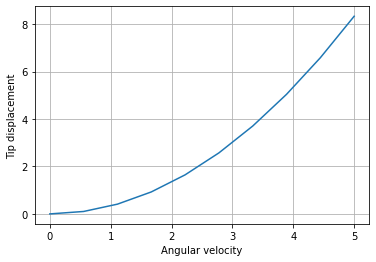

### Part (iii)
**Objective:** to implement Finite difference method to solve the above ODE and compare the solutions with analytical solution for different values of domain discretisation.  L = 1 , $\dfrac{\rho}{E} = 1$ and $\omega = 1$. <br>
We implement the following approximations :
$$\dfrac{d^2u(x_i)}{dx} = \dfrac{u(x_{i+1}) + u(x_{i-1}) - 2u(x_i)}{h^2}$$ 
where $ h = \Delta x = \dfrac{L- 0}{N}$ and $x_i = 0 + ih$ and use notation $u(x_i) = u_i$
<br> Now lets discretise the boundary Conditions $u_0 =  0 $ and $u'(L) = 0$ , which in a approximate manner means $u_{N-1} = u_N$ <br>

The iterative FDM Equation is given by $u_{i+1} + u_{i-1} - 2u_i = -h^2x_i \text{for i = 1,2,..N-1}$ and our additional modifications make the first equation look like $$u_2 - 2u_1 = -h^2x_1$$ and using Neumann BC we have last equation to be 
$$\boxed{u_{N}-2u_{N-1}+u_{N-2} = u_{N-2} - u_{N-1} = -h^2x_{N-1}}$$
<br> So we have N-1 unknows ( as last two terms are same ) ans N-1 Linear equations , hence we can write them down in a matrix fashion like <br><br>
$$\begin{bmatrix}
   -2&1&0&0&\dots&0\\
   1&-2&1&0&\dots&0 \\
   \vdots&\vdots&\ddots&\ddots&\dots\\
   0&\dots&\dots&0&1&-1\\
   \end{bmatrix} 
   \begin{bmatrix}
   u_1\\u_2\\ \vdots \\u_{N-1}
   \end{bmatrix} = -h^2\begin{bmatrix}
   x_1\\x_2\\ \vdots \\x_{N-1}
   \end{bmatrix}$$
   And lets solve them using code for different values of N

Lets analyse our FDM results for different values of N = 5,10,20,50,100 and compare it with the exact function
$$u(x) = \dfrac{x^2}{2} -\dfrac{x^3}{6} $$
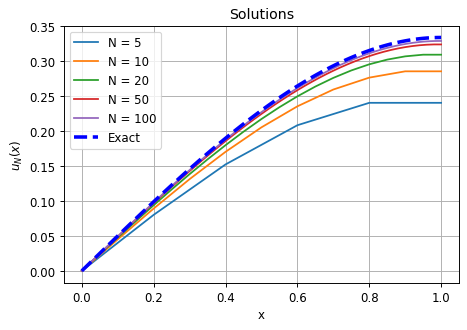As expected , N=5 gave the most error and as we increase the number of iterations we can see that our FDM solutions become more and more accurate. We have also plotted the tip deflection vs iteration order in the graph below and we can see that tip deflection converges to actual value as $N \to \infty$ 


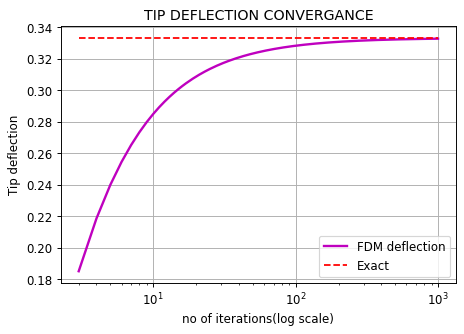
Numerically the tip deflection for different N values and exact values are tabulated below

$$\boxed{
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Oder of iteration N } & \text {Tip deflection }u_N   \\
\hline 
  5    & 0.2399 \\
 10   & 0.2850 \\
 20   & 0.3087 \\
 50   & 0.3234 \\
 100  & 0.3283 \\
 500  & 0.3323 \\
 1000 & 0.3328 \\
 \hline
 \text{exact} &0.3333 \\
\hline
\end{array}
\end{aligned}}
$$

### **CODE** Q1 part iii

In [2]:
def f(x):
    return -x
xe= np.linspace(0,1,100)
def exact(x):
    return x/2 - x*x*x/6
def plotsol(N):
    h = 1/N
    xs = np.linspace(0,1,N+1)
    x = xs[1:-1]
    us = np.ones_like(xs)
    us[0] = 0
    u = np.zeros((N-1))
    A = np.zeros((N-1, N-1))
    for i in range(N - 1):
        A[i, i] = -2.0
    for i in range(0, N - 2):
        A[i, i+1] = 1.0
    for i in range(1, N-1):
        A[i, i-1] = 1.0
    A[N-2,N-2]=-1
    b = h*h*f(x)
    u =np.linalg.solve(A, b)
    for i in range(1,N):
        us[i] = u[i-1]
    us[N]=us[N-1]
    plt.plot(xs,us) 
    
def tip_disp(N):
    h = 1/N
    xs = np.linspace(0,1,N+1)
    x = xs[1:-1]
    us = np.ones_like(xs)
    us[0] = 0
    u = np.zeros((N-1))
    A = np.zeros((N-1, N-1))
    for i in range(N - 1):
        A[i, i] = -2.0
    for i in range(0, N - 2):
        A[i, i+1] = 1.0
    for i in range(1, N-1):
        A[i, i-1] = 1.0
    A[N-2,N-2]=-1
    b = h*h*f(x)
    u =np.linalg.solve(A, b)
    for i in range(1,N):
        us[i] = u[i-1]
    us[N]=us[N-1]
    return us[N] 

In [3]:
Ns=[]
for i in range(3,1000):
    Ns.append(i)
tips=[]
for n in Ns:
    tips.append(tip_disp(n))


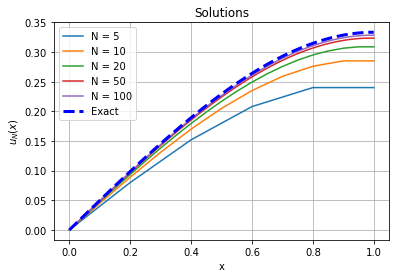

In [4]:
#plt.figure(dpi=85)

plotsol(5)
plotsol(10)
plotsol(20)
plotsol(50)
plotsol(100)
plt.plot(xe,exact(xe),"b--",lw = 3)
plt.legend(["N = 5","N = 10","N = 20","N = 50","N = 100","Exact"])
plt.xlabel("x")
plt.ylabel(r"$u_N(x)$")
plt.title("Solutions")
plt.grid()

plt.show()


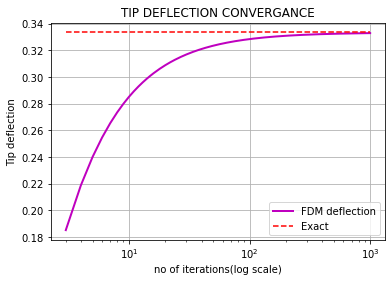

In [5]:
#plt.figure(dpi=85)
ex_tip = exact(1)*np.ones_like(Ns)
plt.plot(Ns,tips,'m-',lw=2)
plt.plot(Ns,ex_tip,'r--')
plt.xscale("log")
plt.xlabel("no of iterations(log scale)")
plt.ylabel("Tip deflection")
plt.legend(["FDM deflection","Exact"])
plt.title("TIP DEFLECTION CONVERGANCE")
plt.grid()
plt.show()

### Part (iv)
Now we will have to develop a potential energy functional based on the displacement function. In a general sense its work done by stresses minus that done by external and body forces. The work done by internal forces is nothing but elastic potential energy which is $\frac{1}{2}\iiint_v [\sigma : \epsilon]dv$  ,which in our problem can be simplified into 
 $\dfrac{\text{EA}}{2}\int_{0}^{L}(\dfrac{du}{dx})^2dx$ as only $\sigma_{xx}$ and $\epsilon_{xx}$ exists , uniform area A and linear elasticity ie; $\sigma_x = E\epsilon_x$.<br>
Now the work done by only external factor which is the centrifual body force is $\rho\omega^2\text{A}\int_{0}^{L}xu(x)dx$ . Now clubbing them all we have our  Potential energy functional:
$$\boxed{\Pi(u) = \dfrac{\text{EA}}{2}\int_{0}^{L}(\dfrac{du}{dx})^2dx -  \rho\omega^2\text{A}\int_{0}^{L}xu(x)dx } $$

Now we have to check if the **_Euler Lagrange_** equations give the governing equations we derived earlier. For that lets minimise the potential energy functional $\Pi(u)$ such that $u \in \mathcal{U}$ where $\mathcal{U} = \{ u : u(0)=0 ; u'(L)=0\}$
and that space is a **_infinite dimensional Vector space_**. So we can perturb the minimising solution u(x) by an element in that space and equate the change to be zero. In a mathematical way we can write it as 
$$\lim_{t \to 0}\dfrac{\Pi(u + t\delta u) - \Pi(u)}{t} = 0  $$
Where $\delta u \in \mathcal{U}$ and $t \in \mathbb{R}$ . Now on implementing this we have 
$$\dfrac{1}{t}(\dfrac{\text{EA}}{2}\int_{0}^{L}[(u' + t\delta u')^2 - (u')^2]dx \text{ } -  \rho\omega^2\text{A}\int_{0}^{L}[x(u+t\delta u)-xu(x)]dx)$$<br>
$$\dfrac{1}{t}(\dfrac{\text{EA}}{2}\int_{0}^{L}[2tu'\delta u' + t^2(\delta u')^2]dx \text{ } -  \rho\omega^2\text{A}\int_{0}^{L}tx\delta udx)$$<br>
$$\dfrac{\text{EA}}{2}\int_{0}^{L}[2u'\delta u' + t(\delta u')^2]dx \text{ } -  \rho\omega^2\text{A}\int_{0}^{L}x\delta udx$$
Now limit t to 0 and equate it to zero , hence we have : 
$$\dfrac{\text{EA}}{2}\int_{0}^{L}2u'\delta u'dx \text{ } -  \rho\omega^2\text{A}\int_{0}^{L}x\delta udx = 0 $$ and this is true for all $\delta u \in \mathcal{U}$ in some sense of directional derivative. But here we have to simplify the above expression using **_integration by parts_**. Also lets cancel out the area term
$$\int_{0}^{L}u'\delta u'dx = [u'\delta u]_0^L - \int_{0}^{L}u''\delta udx ......\text{  Integration by parts}$$
$$ = u'(L)\delta u(L) - u'(0)\delta u(0) - \int_{0}^{L}u''\delta udx $$
$$ = - \int_{0}^{L}u''\delta udx \; \; \; \text{ Since u(0)=0 and }\delta u'(L)=0 $$
<br>
Now we have a theorem that if $\int_D h(x)g(x)dx = 0 $ $\forall h$ then g(x) = 0 $\forall x $ in domain. Applying this we have 
$$ -\text{E}\int_{0}^{L}u''\delta udx -  \rho\omega^2\int_{0}^{L}x\delta udx = 0$$<br>
$$ \int_{0}^{L}(\text{E}\dfrac{d^2u}{dx^2} +  \rho\omega^2 x)\delta udx = 0 \; \; \; \; \; \;  \forall \delta u \in \mathcal{U}$$<br>
This means 
$$\text{E}\dfrac{d^2u}{dx^2} +  \rho\omega^2 x = 0$$<br>
$$\boxed{\dfrac{d^2u(x)}{dx^2} +  (\dfrac{\rho\omega^2 }{\text{E}})x = 0}$$
Hence our minimising equation is same as our governing equation.


### Part (v)
#### **RITZ APPROXIMATION**
Now we are going to approximate our solution using the basis  $\phi_1(x) = sin(\dfrac{\pi x}{2L})$ , $\phi_1(x) = sin(\dfrac{\pi x}{L})$ and $\phi_1(x) = sin(\dfrac{3\pi x}{2L})$ . We have to take the linear combination of these functions and minimise the potential energy functional. So our candidate is 
$$\tilde{u} = a_1\phi_1 + a_2 \phi_2 + a_3 \phi_3$$
Plugging it into our potential energy functional we get 
$$\Pi(a_i \phi_i) = a_i^2\dfrac{EA}{2}\int_0^L (\phi_i')^2dx - a_i\rho\omega^2A\int_0^L x\phi_idx$$ 
and for our guess function 
$$\Pi(\tilde{u})=\Pi(a_1,a_2,a_3) = \dfrac{EA}{2}\int_0^L (a_1\phi_1' + a_2\phi_2' + a_3\phi_3')^2dx - \rho\omega^2A\int_0^L x(a_1\phi_1 + a_2\phi_2 + a_3\phi_3)dx$$
Above is a Quadratic function in 3 variables and its a **_3 dimensional optimisation problem_** where the variables can be computed by solving 3 linear equations $\dfrac{\partial \Pi}{\partial a_i} = 0$ for i = 1,2,3

But an issue here is the basis must belong to $\mathcal{U}$ so putting in constraint $\phi_i'(L) = 0 $ we can see that $\phi_2 \notin \mathcal{U}$ hence $a_2 = 0$ ,  reducing the optimisation problem into a **_2 Dimensional_** one with $a_1 = a$ and $a_3 = b$
$$\Pi(a,b) = \dfrac{EA\pi^2}{16L}(a^2 + 9b^2)  - \rho\omega^2A L^2(\dfrac{4a}{\pi^2} - \dfrac{4b}{9\pi^2} )$$ <br><br>
Applying the minimising constraints $\dfrac{\partial \Pi}{\partial a} = 0 $ and $\dfrac{\partial \Pi}{\partial b}=0$ we get :

$$\boxed{a =\dfrac{32\rho\omega^2L^3}{\pi^4E} \; \text{ and } \;  b =-\dfrac{32\rho\omega^2L^3}{81\pi^4E}}$$<br><br>
Hence our approxed function is $\tilde{u(x)} = \dfrac{32\rho\omega^2L}{\pi^4E}sin(\dfrac{\pi x}{2L})-\dfrac{32\rho\omega^2L}{81\pi^4E}sin(\dfrac{3\pi x}{2L})$ , Now lets plot this with all constants assumed to be 1 and compare it with our exact solution
<br>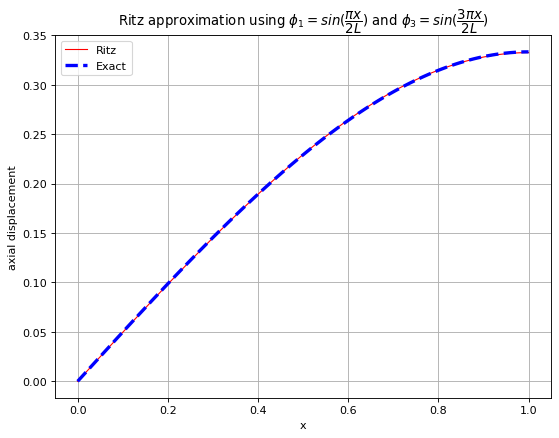<br>
And we also have the error as a function of x for **_ritz solution_** vs actual solution 
<br>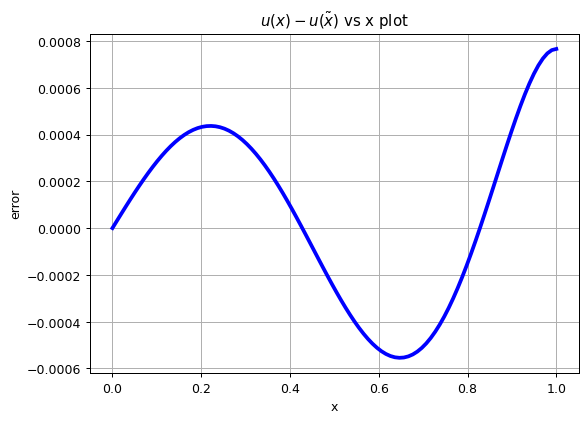<br>
and we can see the error is around the order of $10^{-4}$. Our main objective is to compare the tip displacement of exact solution and Ritz solution.
$$\text{Tip displacement of exact solution is } =\dfrac{\rho\omega^2}{3E}L^3 \\ \\
\text{Tip displacement of Ritz solution is } =\dfrac{2624\rho\omega^2}{81\pi^4E}L^3 \approx \dfrac{\rho\omega^2}{3.0069E}L^3$$
Hence we can conclude that our estimate is **reasonable**

# **CODE** Q1 part v

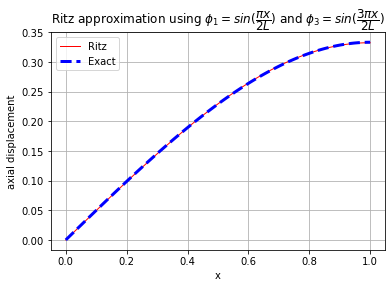

In [6]:
L=1
def u_ap(x):
    return 32*np.sin(np.pi*x*0.5/L)/(np.pi**4) - 32*np.sin(3*np.pi*x*0.5/L)/(81*np.pi**4)
xss =np.linspace(0,1,100)
uacs = exact(xss)
uapx = u_ap(xss)
#plt.figure(figsize=(8,6),dpi=80)
plt.plot(xss,uapx,"r-",lw=1)
plt.plot(xss,uacs,'b--',lw=3)
plt.legend(["Ritz","Exact"])
plt.xlabel("x")
plt.ylabel("axial displacement")
plt.title(r"Ritz approximation using $\phi_1 = sin(\dfrac{\pi x}{2L})$ and $\phi_3 = sin(\dfrac{3\pi x}{2L})$")
plt.grid()
plt.show()

### Part (vi)
We have our axial stress as function of x , $\sigma(x) = Eu'(x) = \dfrac{\rho\omega^2}{2}(L^2 - x^2)$ and if we plot it we get
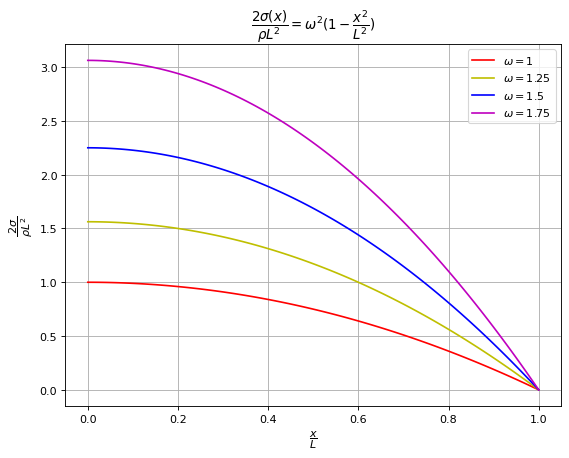
We can graphically see that the maximum stress is at the origin or the pivot ie x = 0 and maximum stress increases parabolically with angular velocity $\omega$ . $$\text{maximum stress } \boxed{\sigma_{max}(\omega) = \omega^2 \dfrac{\rho L^2}{2}}$$
With the knowledge of maximum stress the material can bear $\mathbf{\sigma_Y}$ , we can put an upper bound on the value of omega:
$$\sigma_Y = \omega_{max}^2 \dfrac{\rho L^2}{2} \\ \implies \boxed{\omega_{max} = \sqrt{\dfrac{2\sigma_Y}{\rho L^2}}} \; \text{ The maximum angular velocity at which the blade can rotate}$$ 
<br>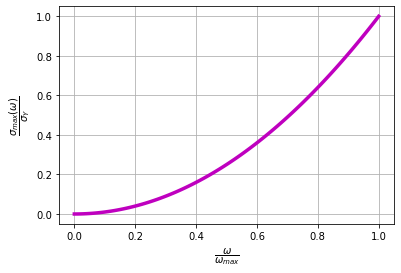<br>
$$\textit{A simple plot to illustrate the relation between peak stress and angular velocity}$$

___________________________________________________________________________________________________________________________________________________


## Question 2
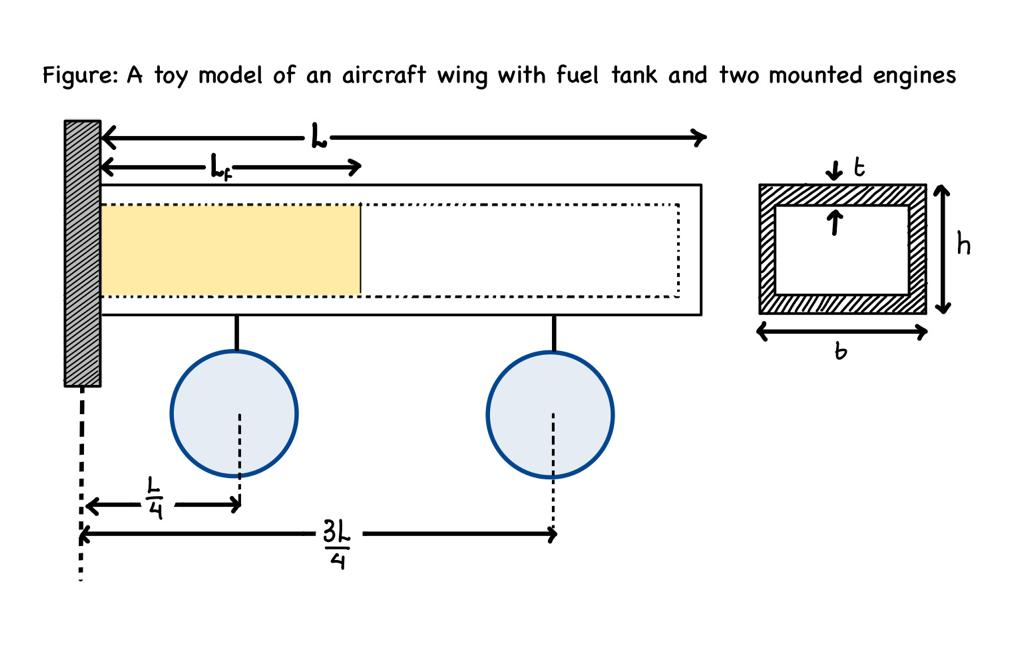

## Part (i)
#### **STEP 1: POTENTIAL FUNCTION**
We have to analyse the loads acting on this Euler bernouli Beam , which involves as of now the weight of fuel , the weight of the engines , and the weight of the wing itself. Now lets plot these loads on a graph
<br>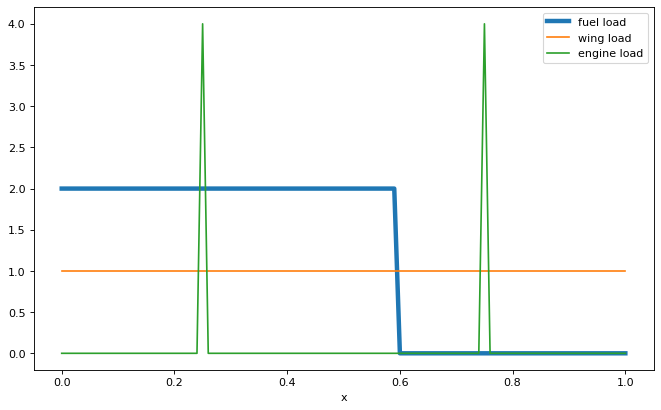<br> $$\textit{Figure for representative use and not to scale}$$
<br>
Now lets model the potential energy function assuming that there is only downward deflection of beam **_w(x)_**. Work done by engine masses is $M_ew(\frac{L}{4})g + M_ew(\frac{3L}{4})g$ . Similarly work by fuel load is $\rho_fA_{i}g\int_0^{L_f}w(x)dx$ and the wing load is $\rho_{Al}A_{cs}g\int_0^{L}w(x)dx$. The potential energy stored in the beam due to deformation is $\dfrac{EI_y}{2}\int_0^L(w")^2dx$. Now plugging them all together we have 
$$\Pi(w) = \dfrac{EI_y}{2}\int_0^L(w")^2dx - \rho_fA_{i}g\int_0^{L_f}w(x)dx - \rho_{Al}A_{cs}g\int_0^{L}w(x)dx - M_ew(\frac{L}{4})g - M_ew(\frac{3L}{4})g $$ <br>
Now we have to minimise this functional with w subject to the boundary conditions $w(0)=0 , w'(0)=0$ ie ;
$w \in \mathcal{W}$ where $\mathcal{W} = \{ w \in \mathbb{C}[0,L]: w(0)=0 , w'(0)=0 \}$.
#### **STEP 2 :  RITZ APPROXIMATION**
Due to complexity of this problem , it is better to minimise the function in a subspace $\tilde{\mathcal{W}}$ of $\mathcal{W}$ spanned by $\{ \phi_k = x^{k + 1} \text{for k = 1,2,3,4,5}   \}$ So let us take a test function $\tilde{w} = \sum_{k=1}^5a_k\phi_k = \sum_{k=1}^5a_kx^{k+1}$ where the dirchlett BC is already satisfied. If we plug this from in $\Pi(w)$ , we get a quadratic expression in 5 variables and we can minimise them as a **_5 dimensional_** linear problem by using 5 equations $\dfrac{\partial}{\partial a_k}\Pi = 0$ . 
We have the linear equations :<br>
$$ 2a_1L + 3a_2L^2 + 4a_3L^3 + 5a_4L^4 + 6a_5L^5 = \dfrac{2}{EI_y}\frac{1}{4}(P_f \dfrac{L_f^3}{3} + P_w\dfrac{L^3}{3} + M_eg\dfrac{L^2}{16} + M_eg\dfrac{9L^2}{16}) \\ 
a_1L^2 + 2a_2L^3 + 3a_3L^4 + 4a_4L^5 + 5a_5L^6 =\dfrac{2}{EI_y} \frac{1}{12}(P_f \dfrac{L_f^4}{4} + P_w\dfrac{L^4}{4} + M_eg(\dfrac{L}{4})^3 + M_eg(\dfrac{3L}{4})^3) \\
\dfrac{2L^3}{3}a_1 +\dfrac{6L^4}{4}a_2+\dfrac{12L^5}{5}a_3+\dfrac{20L^6}{6}a_4+\dfrac{30L^7}{7}a_5=\dfrac{2}{EI_y} \frac{1}{24}(P_f \dfrac{L_f^5}{5} + P_w\dfrac{L^5}{5} + M_eg(\dfrac{L}{4})^4 + M_eg(\dfrac{3L}{4})^4) \\
\dfrac{2L^4}{4}a_1 +\dfrac{6L^5}{5}a_2+\dfrac{12L^6}{6}a_3+\dfrac{20L^7}{7}a_4+\dfrac{30L^8}{8}a_5=\dfrac{2}{EI_y} \frac{1}{40}(P_f \dfrac{L_f^6}{6} + P_w\dfrac{L^6}{6} + M_eg(\dfrac{L}{4})^5 + M_eg(\dfrac{3L}{4})^5) \\
\dfrac{2L^5}{5}a_1 +\dfrac{6L^6}{6}a_2+\dfrac{12L^7}{7}a_3+\dfrac{20L^8}{8}a_4+\dfrac{30L^9}{9}a_5= \dfrac{2}{EI_y}\frac{1}{60}(P_f \dfrac{L_f^7}{7} + P_w\dfrac{L^7}{7} + M_eg(\dfrac{L}{4})^6 + M_eg(\dfrac{3L}{4})^6) \\
$$

<br><br> For the purpose of coding lets parameterise this system of equations into<br>
$$[A_{ij} ] [ a_i ] = [f_i] \\
A_{ij} = \dfrac{j(j+1)L^{i+j-1}}{i+j-1}\\
f_i = \dfrac{2}{EI_y}\dfrac{1}{2i(i+1)} (P_f \dfrac{L_f^{i+2}}{i+2} + P_w\dfrac{L^{i+2}}{i+2} + M_eg(\dfrac{L}{4})^{i+1} + M_eg(\dfrac{3L}{4})^{i+1})
$$
Hence our equations can also be written as : 
<br><br>
$$\boxed{\sum_{j=1}^5 \dfrac{j(j+1)L^{i+j-1}}{i+j-1}a_j =\dfrac{2}{EI_y} \dfrac{1}{2i(i+1)} (P_f \dfrac{L_f^{i+2}}{i+2} + P_w\dfrac{L^{i+2}}{i+2} + M_eg(\dfrac{L}{4})^{i+1} + M_eg(\dfrac{3L}{4})^{i+1})}$$

Here $P_f$ is fuel load per unit length = $\rho_f A_i g$ and $P_w$ the wings own weight per unit length  = $\rho_{Al}A_{cs}g$. Lets solve this for given values of the parameters

$w(x)$ is taken as negative as the deflection is downward

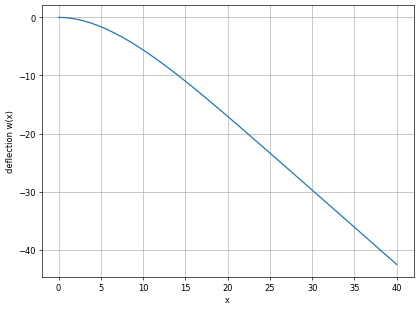

We used an approximate solution to solve the deformation of the wing and from that function our wing tip deflection is $\textbf{w(40) = -42.52m}$

Lets see how the wing deformation looks like. Below is a qualitative depiction (_not to scale_) of the deformed shape of the wing

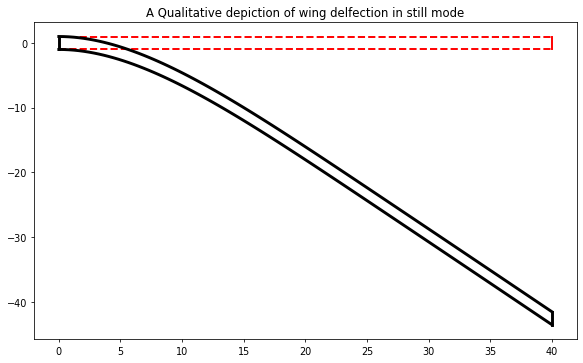

### Q2 part 1 Codes

In [7]:
L=40
g=9.8
Lf = 0.6*40
dal=2700
df=800
Me =2000
Ai = (5-2e-3)*(0.5-2e-3)
Acs = 11e-3
Pf = df*Ai*g
Pw = dal*Acs*g
E = 7e10 # data from internet
Iy =(0.5**3)*(1e-3)/6 + (5*0.5*0.5*1e-3)/2 #geometry => cs is two rods parrael to axis + 2 rods rotating along axis 
                                          #y axis is the axis through centroid perpendicular to rod and deflection direction
def A(i,j):                                  
    return j*(j+1)*(L**(i+j-1))/(i+j-1)
def f(i):
    return 2*(Pf*(Lf**(i+2))/(i+2) + Pw*(L**(i+2))/(i+2) + Me*g*((L/4)**(i+1) +(3*L/4)**(i+1)))/(2*i*(i+1)*E*Iy)
B = np.zeros((5,5))
for i in range(0,5):
    for j in range(0,5):
        B[i,j]=A(i+1,j+1)
fs = np.zeros((5))
for i in range(0,5):
    fs[i] = f(i+1)
ais = np.linalg.solve(B, fs)

In [8]:
def w(x):
    s=0
    for i in range(0,5):
        s = s + ais[i]*(x**(i+2))
    return s

In [9]:
xs = np.linspace(0,40,100)
ws =w(xs)

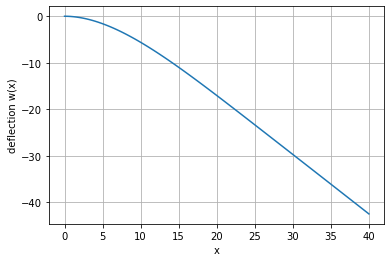

In [10]:
#plt.figure(figsize=(8,6),dpi=60)
plt.plot(xs,-ws)
plt.xlabel("x")
plt.ylabel("deflection w(x)")
plt.grid()

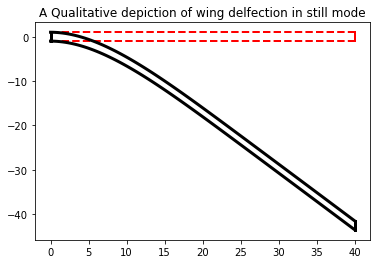

In [11]:
#plt.figure(figsize=(10,6),dpi=70)
ys=np.linspace(-1e-5,1e-5)
x1=np.zeros_like(ys)
plt.plot(xs,w(xs)-w(xs)+ 1,'r--',lw=2)
plt.plot(xs,w(xs)-w(xs)-1,'r--',lw=2)
plt.plot(x1+40,ys*1e5,'r-',lw=2)
plt.plot(xs,(-w(xs)+1),'k-',lw=3)
plt.plot(xs,(-w(xs)-1),'k-',lw=3)
plt.plot(x1,ys*1e5,'k-',lw=3)
plt.plot(x1+40,(ys*1e5 - w(40)),'k-',lw=3)

plt.title("A Qualitative depiction of wing delfection in still mode")
#plt.axis("equal")
plt.show()

In [12]:
print("tip deflection = " ,w(40))

tip deflection =  42.52102989810788


### **STEP 3: MODIFICATIONS WITH LIFT**
To accomodate the changes in lift we just have to modify our $P_w$ term and give the lift load in opposite direction. The new $P_w$ is $\rho_{Al}A_{cs}g - \dfrac{1}{2}b\rho C_L v^2$. Lets see the deflection plots for various values of v

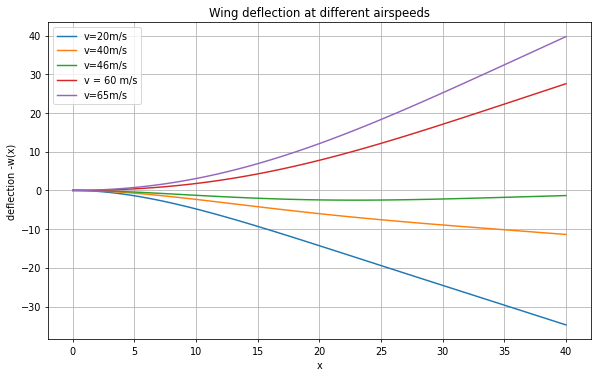

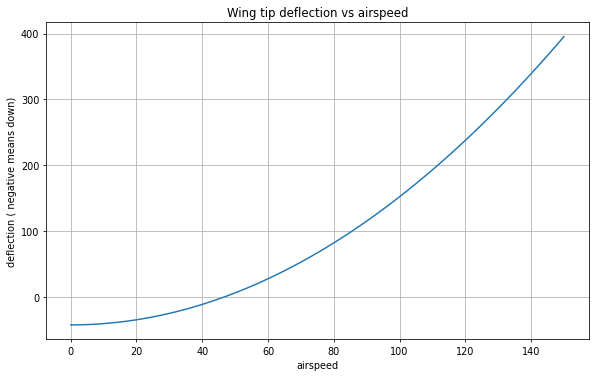

From the above plot we can see that the wing tip deflection becomes zero for value of airspeed around 46/s. In order to get a better estimate of that velocity lets implement a simple search algorithm in interval $[ 40,50]$. The code can be found below.<br>
our estimated speed for zero wing deflection is **46.74** m/s

### Q2 :  Part ii CODES

In [13]:
L=40
g=9.8
Lf = 0.6*40
dal=2700
df=800
Me =2000
Ai = (5-2e-3)*(0.5-2e-3)
Acs = 11e-3
Pf = df*Ai*g
E = 7e10 # data from internet
Iy = (0.5**3)*(1e-3)/6 + (5*0.5*0.5*1e-3)/2 #geometry
cl=1
rho = 1.1
def A(i,j):
    return j*(j+1)*(L**(i+j-1))/(i+j-1)
def plot_def(v):
    Pw = dal*Acs*g - 0.5*cl*rho*5*(v**2)
    def f(i):
        return 2*(Pf*(Lf**(i+2))/(i+2) + Pw*(L**(i+2))/(i+2) + Me*g*((L/4)**(i+1) +(3*L/4)**(i+1)))/(2*i*(i+1)*E*Iy)
    B = np.zeros((5,5))
    for i in range(0,5):
        for j in range(0,5):
            B[i,j]=A(i+1,j+1)
    fs = np.zeros((5))
    for i in range(0,5):
        fs[i] = f(i+1)
    ais = np.linalg.solve(B, fs)
    def w(x):
        s=0
        for i in range(0,5):
            s = s + ais[i]*(x**(i+2))
        return s
    xs = np.linspace(0,40,100)
    ws =w(xs)
    plt.plot(xs,-ws)
    
    
def tip_defl(v):
    Pw = dal*Acs*g - 0.5*cl*5*rho*(v**2)
    def f(i):
        return 2*(Pf*(Lf**(i+2))/(i+2) + Pw*(L**(i+2))/(i+2) + Me*g*((L/4)**(i+1) +(3*L/4)**(i+1)))/(2*i*(i+1)*E*Iy)
    B = np.zeros((5,5))
    for i in range(0,5):
        for j in range(0,5):
            B[i,j]=A(i+1,j+1)
    fs = np.zeros((5))
    for i in range(0,5):
        fs[i] = f(i+1)
    ais = np.linalg.solve(B, fs)
    def w(x):
        s=0
        for i in range(0,5):
            s = s + ais[i]*(x**(i+2))
        return s
    return w(L)

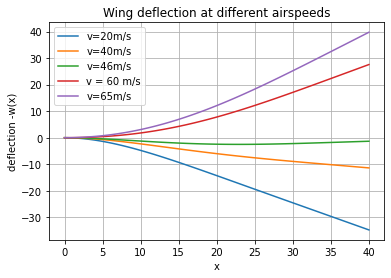

In [14]:
#plt.figure(figsize=(10,6),dpi=70)
plot_def(20)
plot_def(40)
plot_def(46)
plot_def(60)
plot_def(65)




plt.xlabel("x")
plt.ylabel("deflection -w(x)")
plt.title("Wing deflection at different airspeeds")

plt.legend(["v=20m/s","v=40m/s","v=46m/s","v = 60 m/s","v=65m/s"])
plt.grid()


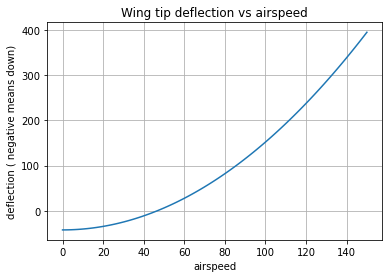

In [15]:
#plt.figure(figsize=(10,6),dpi=70)
vs = np.linspace(0,150,100)
tps =[]
for v in vs:
    tps.append(-tip_defl(v))
plt.plot(vs,tps)
plt.title("Wing tip deflection vs airspeed")
plt.ylabel("deflection ( negative means down)")
plt.xlabel("airspeed")
plt.grid()

### Search algorithm:

In [16]:
x_s =np.linspace(40,50,10000)
for x in x_s:
    if np.abs(tip_defl(x))<10**(-2.9):
        print(x)
    


46.737673767376734


In [17]:
tip_defl(46.737673767376734)

0.0005300356168476128